In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('Electricity BILL.csv')  

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

print(train_data.head())  
print("Train Data :", train_data.shape, "Test Data :", test_data.shape)

      Building_Type  Construction_Year  Number_of_Floors  \
1194    Residential               1994                12   
911   Institutional               1984                13   
422   Institutional               2005                 4   
670     Residential               1974                 1   
931      Commercial               1984                11   

      Energy_Consumption_Per_SqM  Water_Usage_Per_Building  \
1194                        50.0                580.606931   
911                         50.0                970.030615   
422                         50.0               1500.000000   
670                         50.0               1189.472269   
931                        250.0                239.075260   

      Waste_Recycled_Percentage  Occupancy_Rate  Indoor_Air_Quality  \
1194                  43.094641       80.259802            6.102523   
911                   15.275873       60.502829            1.992007   
422                   36.814778       90.148878      

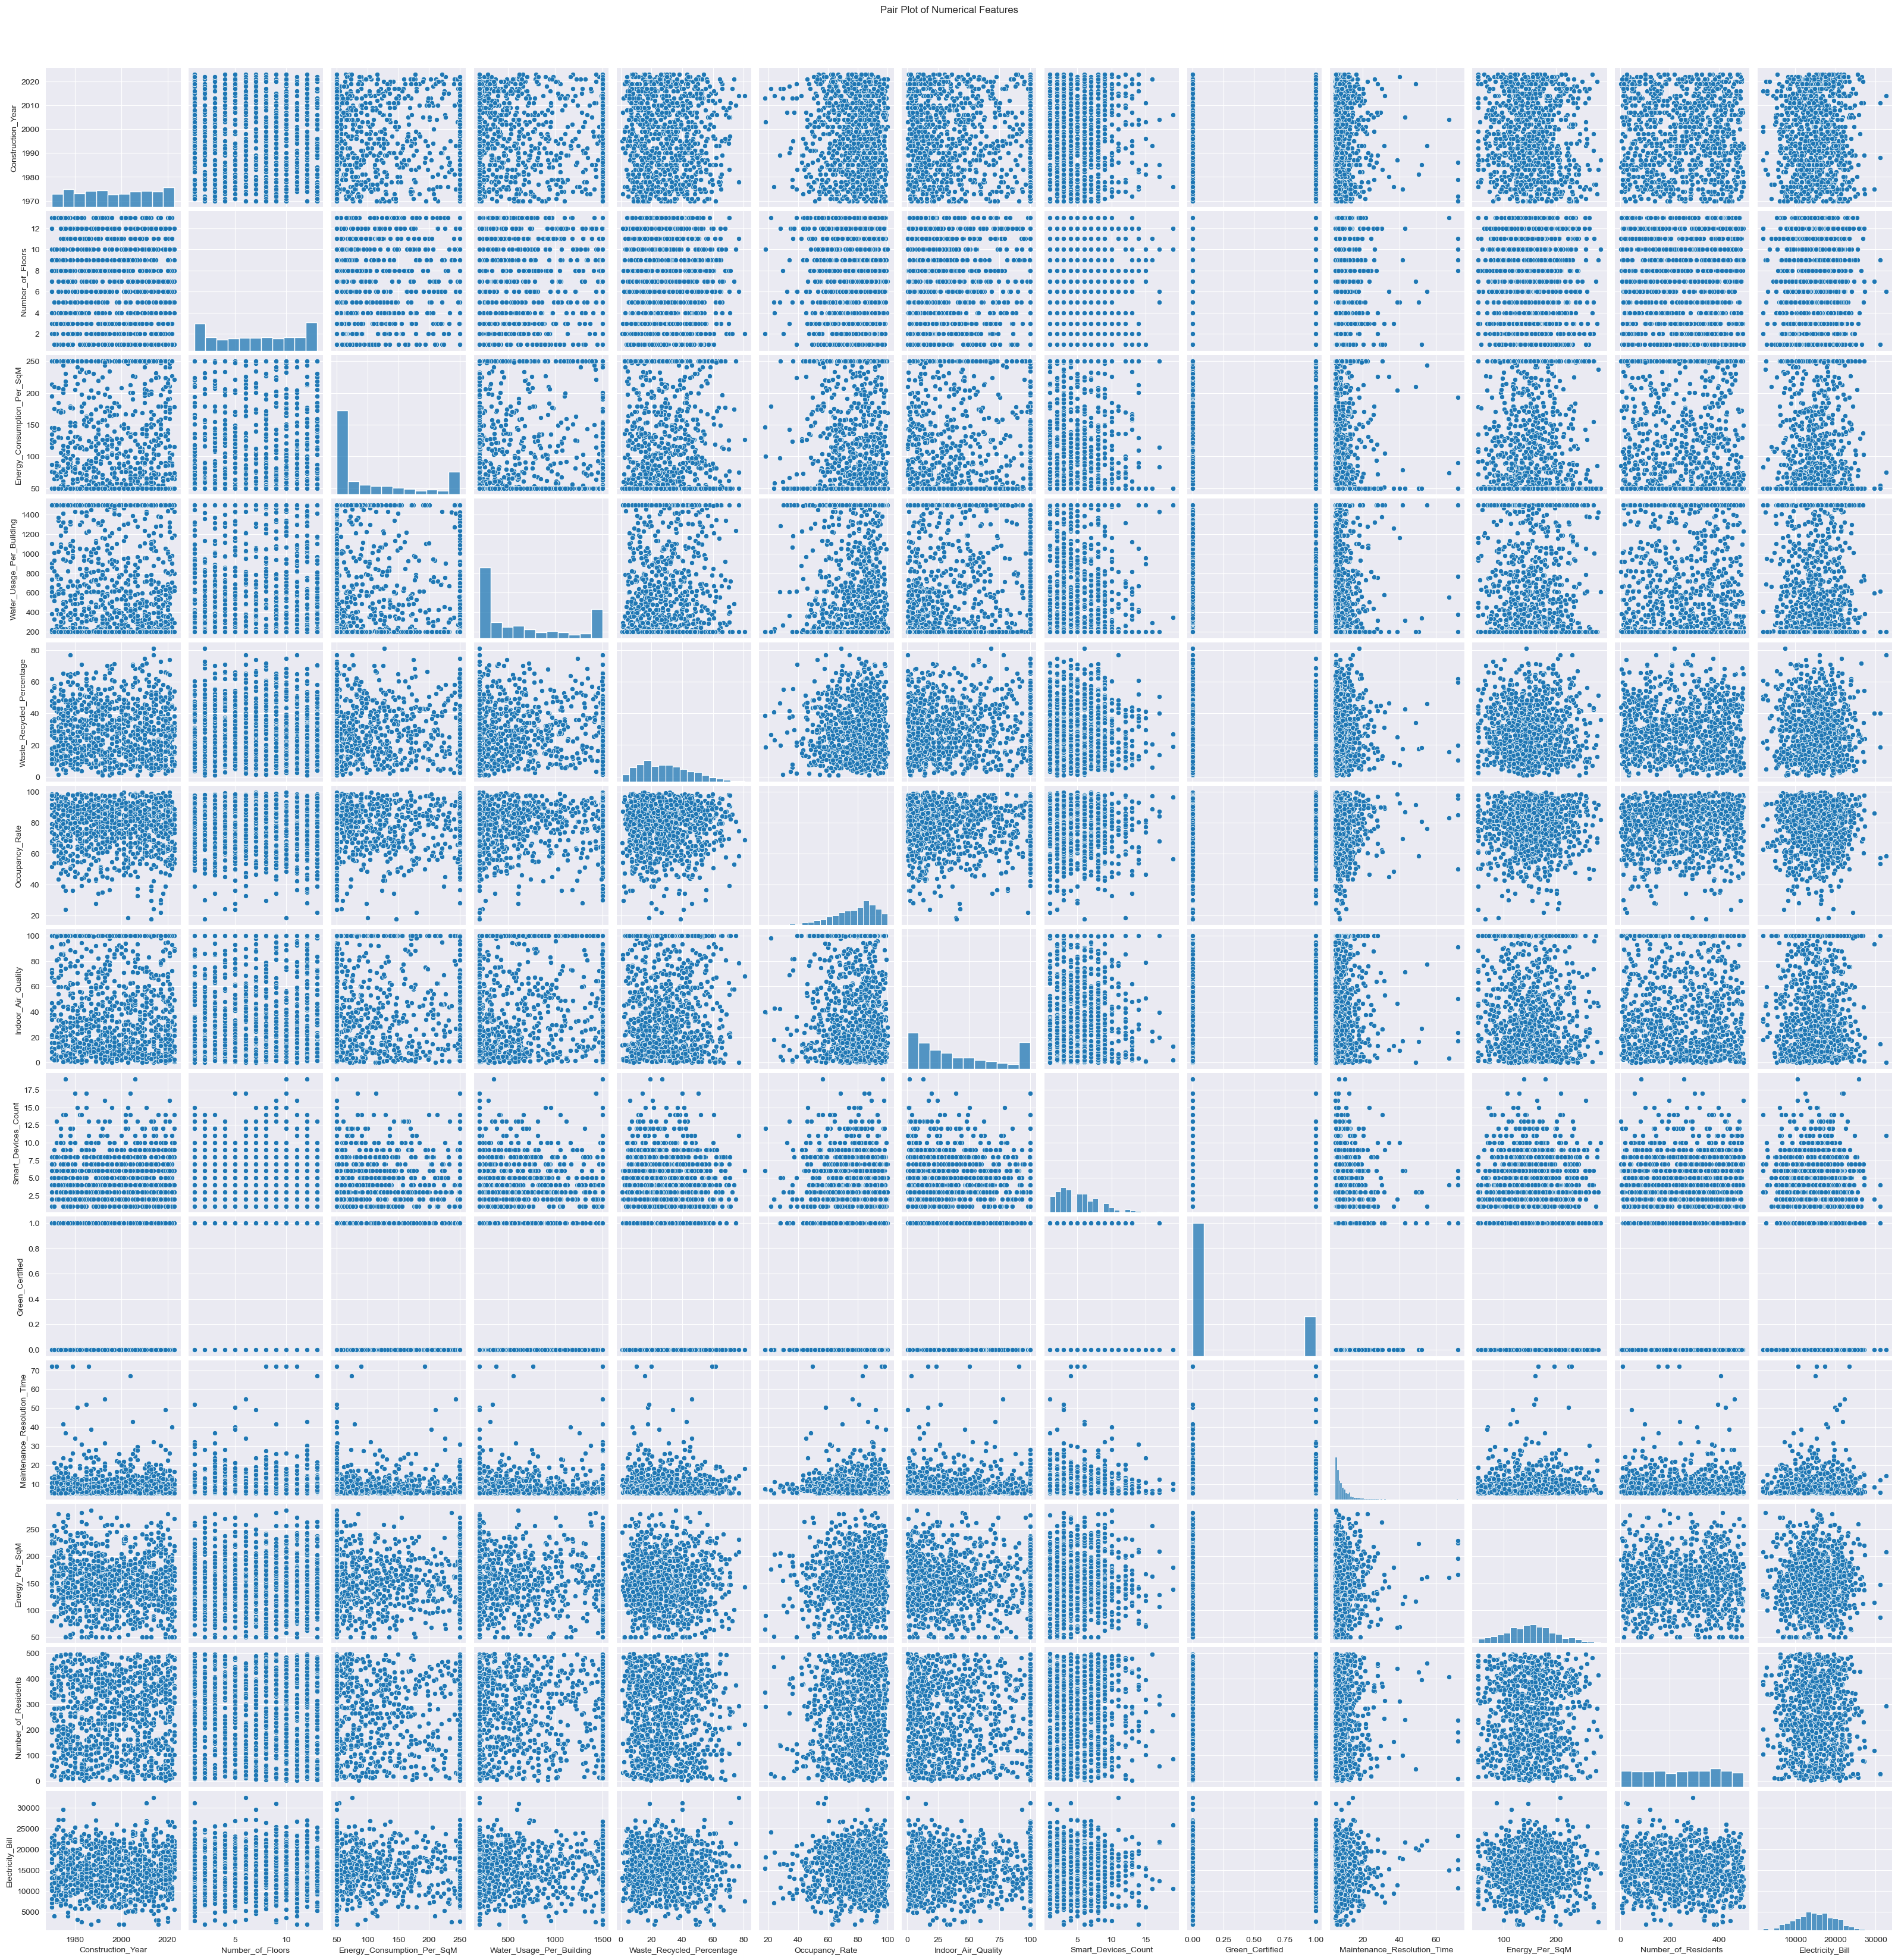

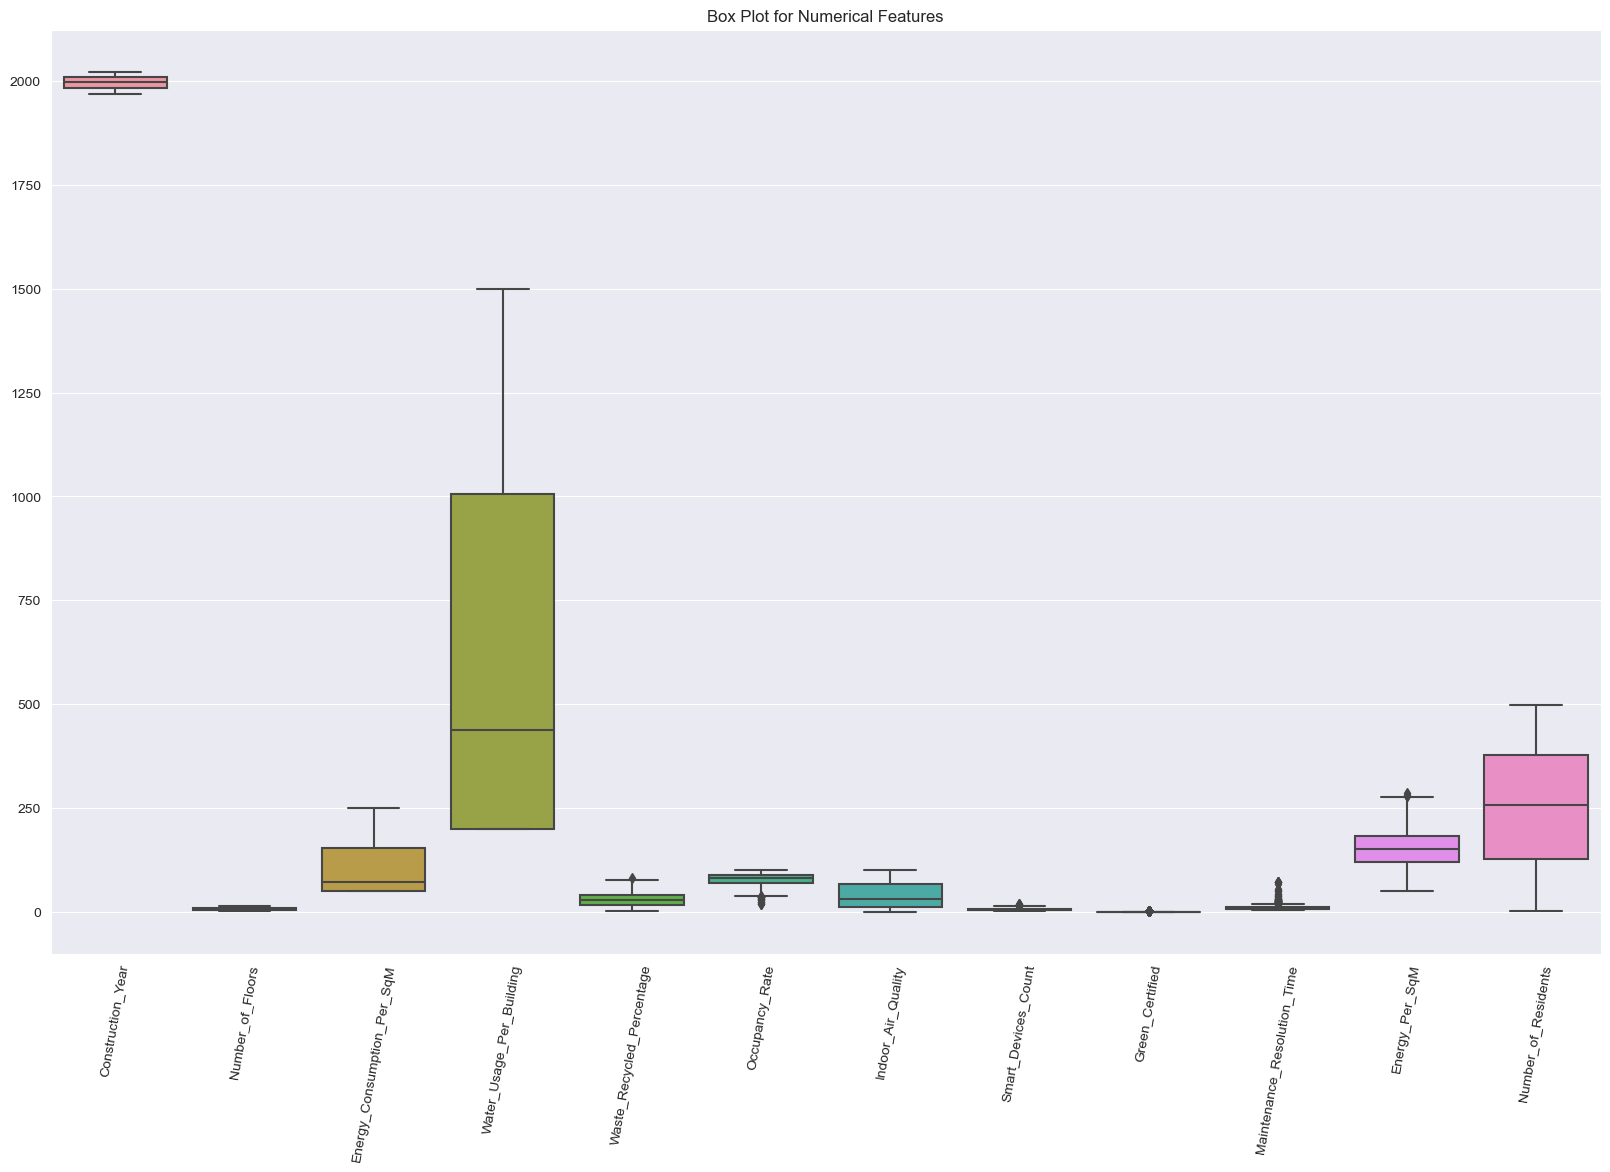

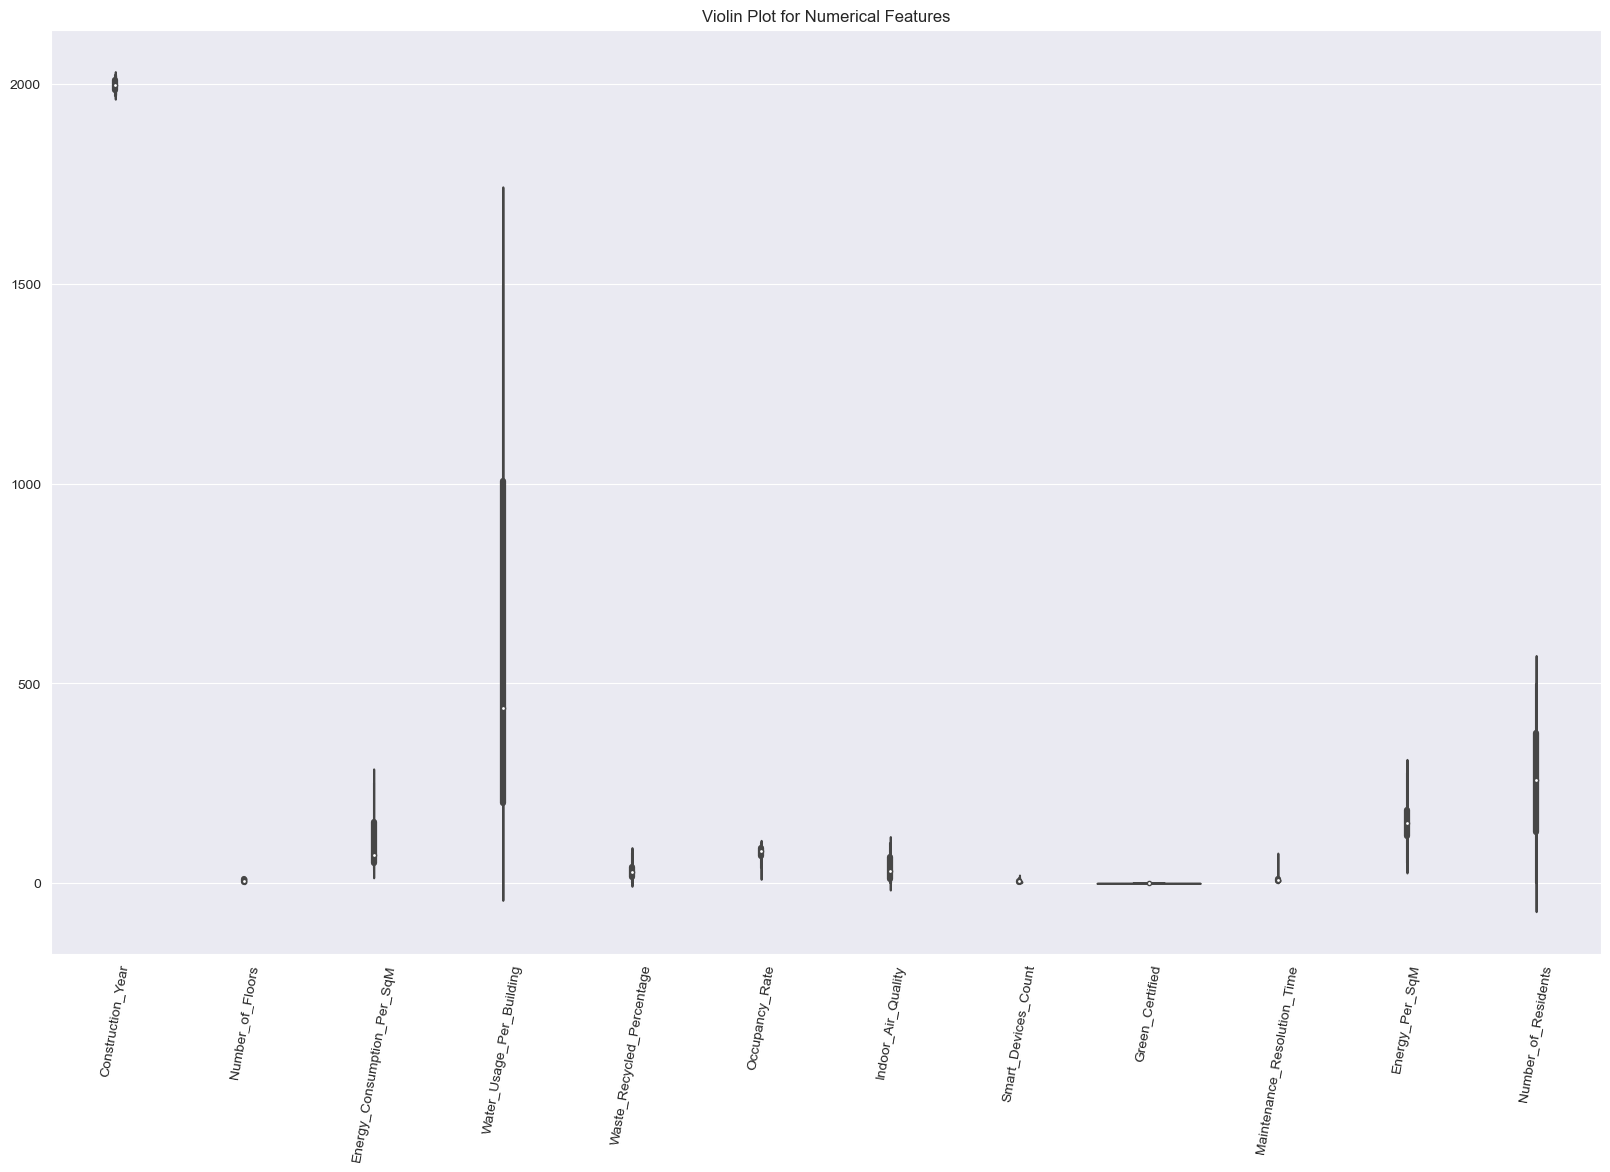

<Figure size 1200x600 with 0 Axes>

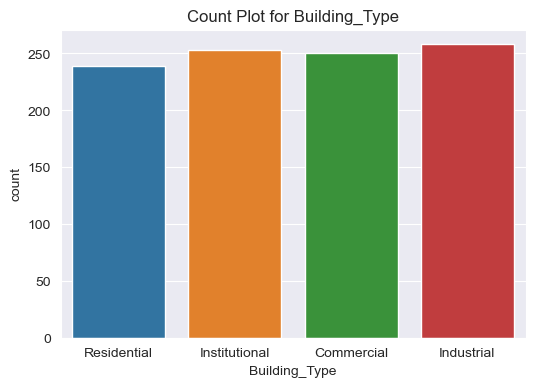

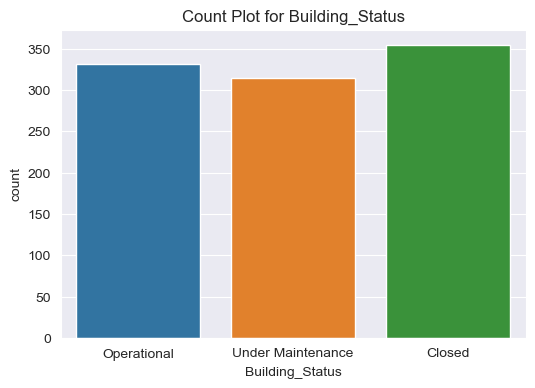

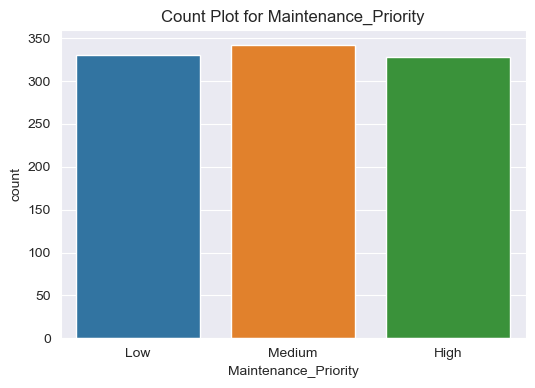

C:\Users\manis\AppData\Local\Temp\ipykernel_17476\886532335.py:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_data.corr()


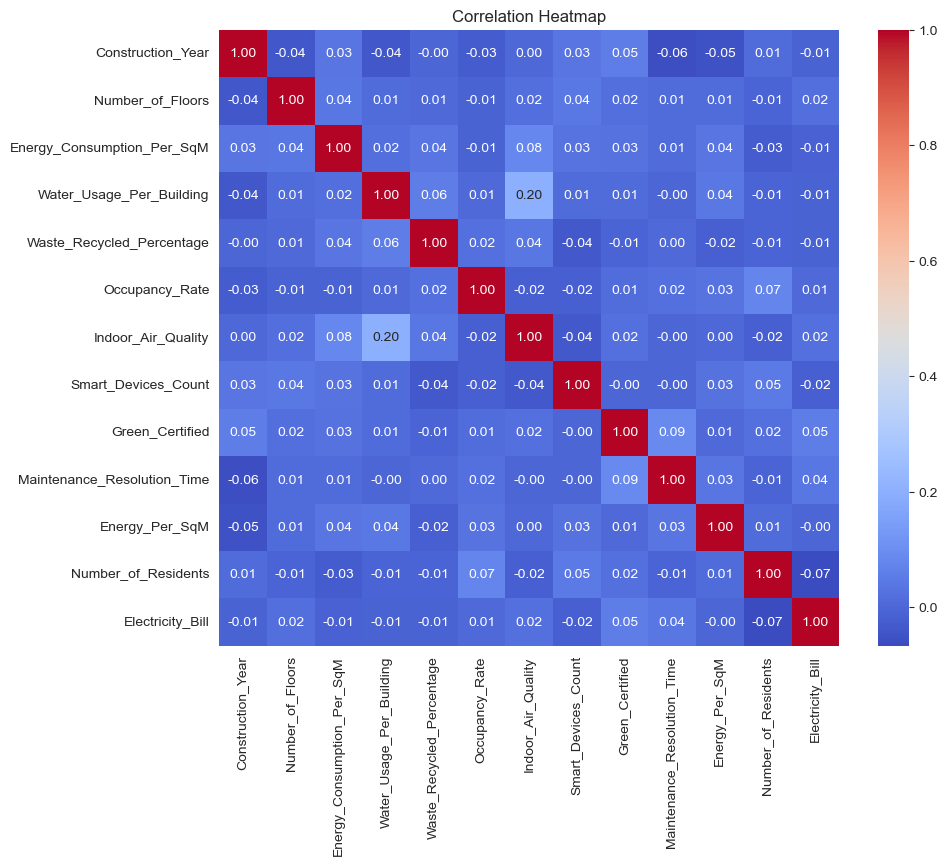

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(train_data)
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

plt.figure(figsize=(20, 12))
sns.boxplot(data=train_data.select_dtypes(include='number').drop('Electricity_Bill', axis=1))
plt.xticks(rotation=80)  
plt.title('Box Plot for Numerical Features')
plt.show()

plt.figure(figsize=(20, 12))
sns.violinplot(data=train_data.select_dtypes(include='number').drop('Electricity_Bill', axis=1))
plt.xticks(rotation=80)  
plt.title('Violin Plot for Numerical Features')
plt.show()

categorical_columns = train_data.select_dtypes(include='object').columns
plt.figure(figsize=(12, 6))
for column in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=column, data=train_data)
    plt.title(f'Count Plot for {column}')
    plt.show()

plt.figure(figsize=(10, 8))
corr = train_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


5 observations - 

1. The pair plots indicate weak relationship between the features, The data points are fairly scattered, which shows that the majority of relationships between the variables are not strongly linear.
2. Some scatterplots show potential outliers, which should be removed to make it easier for the model to learn the true pattern and captuare the true performance of the model during evalutation.
3. The values for Construction_Year are tightly packed, indicating that most buildings in the dataset were built within a narrow range of years. This is consistent in both the violin and box plots.
4. Both the violin and box plots indicate that the majority of values for Waste_Recycled_Percentage are concentrated towards the lower end, likely indicating that a smaller percentage of waste is recycled in most cases.
5. The correlation heat map indicates that the target variable Electricity_Bill shows very low correlation with all other features i.e. none of the features have a strong linear relationship with the target.

C:\Users\manis\anaconda3\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


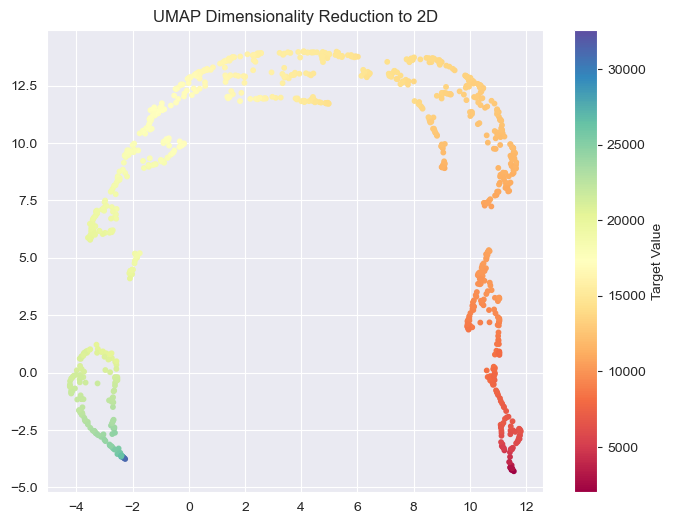

In [41]:
import umap
from sklearn.preprocessing import StandardScaler

numerical_features = train_data.select_dtypes(include='number').columns
# scaler = StandardScaler()
train_numerical = (train_data[numerical_features])

reducer = umap.UMAP(n_components=2, random_state=42)
train_umap = reducer.fit_transform(train_numerical)

plt.figure(figsize=(8, 6))
plt.scatter(train_umap[:, 0], train_umap[:, 1], c=train_data['Electricity_Bill'], cmap='Spectral', s=10)  
plt.colorbar(label='Target Value')
plt.title('UMAP Dimensionality Reduction to 2D')
plt.show()


The color gradient, representing the target variable (Electricity_Bill), shows a smooth transition from lower values (green/blue) to higher values (yellow/red). This shows a general trend where similar target values are positioned near each other. The continuous color gradient suggests that the target variable (likely Electricity_Bill) correlates with the structure of the data, meaning similar bills are grouped together.

The UMAP projection shows good clustering and separability, especially in areas with more distinct data groups. There is a cluster on the bottom left, one on the bottom right and a continuous spread over the upper portion of the plot.

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

data = pd.read_csv('Electricity BILL.csv')  

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

for col in train_data.select_dtypes(include=['number']).columns:
    train_data[col].fillna(train_data[col].median(), inplace=True)
    test_data[col].fillna(test_data[col].median(), inplace=True)

for col in train_data.select_dtypes(include=['object']).columns:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)
    test_data[col].fillna(test_data[col].mode()[0], inplace=True)

# numerical_features = train_data.select_dtypes(include='number').columns
# scaler = StandardScaler()
# train_data[numerical_features] = scaler.fit_transform(train_data[numerical_features])
# test_data[numerical_features] = scaler.transform(test_data[numerical_features])

label_encoders = {}
for col in train_data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])
    label_encoders[col] = le

X_train = train_data.drop('Electricity_Bill', axis=1)  
y_train = train_data['Electricity_Bill']
X_test = test_data.drop('Electricity_Bill', axis=1)
y_test = test_data['Electricity_Bill']

# print("X_Train ----------------------------")
# print(X_train)
# print("X_Test ------------------------------")
# print(X_test)
# print("Y_Train ------------------------------")
# print(y_train)
# print("Y_Test --------------------------------")
# print(y_test)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


n_train = X_train.shape[0]  
p = X_train.shape[1]       
adjusted_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - p - 1))

n_test = X_test.shape[0]    
adjusted_r2_test = 1 - (1 - r2_test) * ((n_test - 1) / (n_test - p - 1))

print("Train Set Metrics:")
print(f"  MSE: {mse_train:.4f}")
print(f"  RMSE: {rmse_train:.4f}")
print(f"  MAE: {mae_train:.4f}")
print(f"  R2 Score: {r2_train:.4f}")
print(f"  Adjusted R2 Score: {adjusted_r2_train:.4f}")

print("\nTest Set Metrics:")
print(f"  MSE: {mse_test:.4f}")
print(f"  RMSE: {rmse_test:.4f}")
print(f"  MAE: {mae_test:.4f}")
print(f"  R2 Score: {r2_test:.4f}")
print(f"  Adjusted R2 Score: {adjusted_r2_test:.4f}")


Train Set Metrics:
  MSE: 24475013.1685
  RMSE: 4947.2228
  MAE: 4006.3285
  R2 Score: 0.0139
  Adjusted R2 Score: -0.0011

Test Set Metrics:
  MSE: 24278016.1557
  RMSE: 4927.2727
  MAE: 3842.4093
  R2 Score: 0.0000
  Adjusted R2 Score: -0.0641


In [13]:
from sklearn.feature_selection import RFE

lr_model_d = LinearRegression()
rfe = RFE(estimator=lr_model_d, n_features_to_select=3)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print(f"Top 3 selected features using RFE: {selected_features}")

X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

lr_model_rfe = LinearRegression()
lr_model_rfe.fit(X_train_rfe, y_train)

y_train_pred_rfe = lr_model_rfe.predict(X_train_rfe)
y_test_pred_rfe = lr_model_rfe.predict(X_test_rfe)

mse_train_rfe = mean_squared_error(y_train, y_train_pred_rfe)
mse_test_rfe = mean_squared_error(y_test, y_test_pred_rfe)
rmse_train_rfe = np.sqrt(mse_train_rfe)
rmse_test_rfe = np.sqrt(mse_test_rfe)
mae_train_rfe = mean_absolute_error(y_train, y_train_pred_rfe)
mae_test_rfe = mean_absolute_error(y_test, y_test_pred_rfe)
r2_train_rfe = r2_score(y_train, y_train_pred_rfe)
r2_test_rfe = r2_score(y_test, y_test_pred_rfe)

adjusted_r2_train_rfe = 1 - (1 - r2_train_rfe) * ((n_train - 1) / (n_train - 3 - 1))  # 3 features selected
adjusted_r2_test_rfe = 1 - (1 - r2_test_rfe) * ((n_test - 1) / (n_test - 3 - 1))

print("\nModel with Top 3 Features Selected using RFE:")
print(f"  MSE (Train): {mse_train_rfe:.4f}, MSE (Test): {mse_test_rfe:.4f}")
print(f"  RMSE (Train): {rmse_train_rfe:.4f}, RMSE (Test): {rmse_test_rfe:.4f}")
print(f"  MAE (Train): {mae_train_rfe:.4f}, MAE (Test): {mae_test_rfe:.4f}")
print(f"  R2 Score (Train): {r2_train_rfe:.4f}, R2 Score (Test): {r2_test_rfe:.4f}")
print(f"  Adjusted R2 Score (Train): {adjusted_r2_train_rfe:.4f}, Adjusted R2 Score (Test): {adjusted_r2_test_rfe:.4f}")


Top 3 selected features using RFE: Index(['Building_Type', 'Green_Certified', 'Building_Status'], dtype='object')

Model with Top 3 Features Selected using RFE:
  MSE (Train): 24673540.3115, MSE (Test): 24181190.6472
  RMSE (Train): 4967.2468, RMSE (Test): 4917.4374
  MAE (Train): 4006.7840, MAE (Test): 3825.6516
  R2 Score (Train): 0.0059, R2 Score (Test): 0.0040
  Adjusted R2 Score (Train): 0.0029, Adjusted R2 Score (Test): -0.0081


In [36]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('Electricity BILL.csv')

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# for col in train_data.select_dtypes(include=['number']).columns:
#     train_data[col].fillna(train_data[col].median(), inplace=True)
#     test_data[col].fillna(test_data[col].median(), inplace=True)
# 
# for col in train_data.select_dtypes(include=['object']).columns:
#     train_data[col].fillna(train_data[col].mode()[0], inplace=True)
#     test_data[col].fillna(test_data[col].mode()[0], inplace=True)

X_train = train_data.drop('Electricity_Bill', axis=1)  
X_test = test_data.drop('Electricity_Bill', axis=1)  
y_train = train_data['Electricity_Bill']
y_test = test_data['Electricity_Bill']

# Scale numerical features
numerical_features = X_train.select_dtypes(include='number').columns
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

categorical_columns = X_train.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse=False)

X_train_encoded = encoder.fit_transform(X_train[categorical_columns])

encoded_train_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_columns))

numerical_features_test = X_test.select_dtypes(include='number').columns
scaler = StandardScaler()
X_test[numerical_features] = scaler.fit_transform(X_test[numerical_features])

categorical_columns = X_test.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse=False)

X_test_encoded = encoder.fit_transform(X_test[categorical_columns])

encoded_test_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# print(encoded_train_df.head())

X_train_numeric = X_train.drop(categorical_columns, axis=1)
X_test_numeric = X_test.drop(categorical_columns, axis=1)

X_train_full = pd.concat([X_train_numeric.reset_index(drop=True), encoded_train_df.reset_index(drop=True)], axis=1)
X_test_full = pd.concat([X_test_numeric.reset_index(drop=True), encoded_test_df.reset_index(drop=True)], axis=1)

print(f"X_train_full shape: {X_train_full.shape}")
print(f"X_test_full shape: {X_test_full.shape}")
print(X_train_full[:10])
print(X_train_full.shape[1])



ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_full, y_train)

y_train_pred_ridge = ridge_model.predict(X_train_full)
y_test_pred_ridge = ridge_model.predict(X_test_full)

mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)
mae_train_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
mae_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

n_train = X_train_full.shape[0]  
p_train = X_train_full.shape[1]  
adjusted_r2_train_ridge = 1 - (1 - r2_train_ridge) * ((n_train - 1) / (n_train - p_train - 1))

n_test = X_test_full.shape[0]  
p_test = X_test_full.shape[1]   
adjusted_r2_test_ridge = 1 - (1 - r2_test_ridge) * ((n_test - 1) / (n_test - p_test - 1))

print("\nRidge Regression with One-Hot Encoded Features:")
print(f"Train Set Metrics:")
print(f"  MSE: {mse_train_ridge:.4f}")
print(f"  RMSE: {rmse_train_ridge:.4f}")
print(f"  MAE: {mae_train_ridge:.4f}")
print(f"  R2 Score: {r2_train_ridge:.4f}")
print(f"  Adjusted R2 Score: {adjusted_r2_train_ridge:.4f}")

print("\nTest Set Metrics:")
print(f"  MSE: {mse_test_ridge:.4f}")
print(f"  RMSE: {rmse_test_ridge:.4f}")
print(f"  MAE: {mae_test_ridge:.4f}")
print(f"  R2 Score: {r2_test_ridge:.4f}")
print(f"  Adjusted R2 Score: {adjusted_r2_test_ridge:.4f}")


X_train_full shape: (1000, 19)
X_test_full shape: (250, 19)
   Construction_Year  Number_of_Floors  Energy_Consumption_Per_SqM  \
0          -0.194382          1.300569                   -0.807078   
1          -0.830450          1.564216                   -0.807078   
2           0.505292         -0.808604                   -0.807078   
3          -1.466517         -1.599544                   -0.807078   
4          -0.830450          1.036922                    1.969636   
5          -0.766843         -0.281311                    0.768011   
6          -0.003562          1.300569                   -0.807078   
7           0.060045         -0.017664                   -0.796091   
8           0.441685          1.564216                    0.316134   
9           0.886932         -0.017664                   -0.644174   

   Water_Usage_Per_Building  Waste_Recycled_Percentage  Occupancy_Rate  \
0                 -0.121631                   0.839266        0.198607   
1                  0.

C:\Users\manis\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\manis\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [37]:
from sklearn.decomposition import FastICA
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def perform_ica_and_ridge(X_train_full, X_test_full, y_train, y_test, n_components):
    ica = FastICA(n_components=n_components, random_state=42)
    X_train_ica = ica.fit_transform(X_train_full)
    X_test_ica = ica.transform(X_test_full)

    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train_ica, y_train)

    y_train_pred_ridge = ridge_model.predict(X_train_ica)
    y_test_pred_ridge = ridge_model.predict(X_test_ica)

    mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
    mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
    rmse_train_ridge = np.sqrt(mse_train_ridge)
    rmse_test_ridge = np.sqrt(mse_test_ridge)
    mae_train_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
    mae_test_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
    r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
    r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

    n_train = X_train_ica.shape[0]  
    p_train = X_train_ica.shape[1]  
    adjusted_r2_train_ridge = 1 - (1 - r2_train_ridge) * ((n_train - 1) / (n_train - p_train - 1))

    n_test = X_test_ica.shape[0]    
    p_test = X_test_ica.shape[1]   
    adjusted_r2_test_ridge = 1 - (1 - r2_test_ridge) * ((n_test - 1) / (n_test - p_test - 1))

    return {
        "n_components": n_components,
        "train_mse": mse_train_ridge,
        "test_mse": mse_test_ridge,
        "train_rmse": rmse_train_ridge,
        "test_rmse": rmse_test_ridge,
        "train_mae": mae_train_ridge,
        "test_mae": mae_test_ridge,
        "train_r2": r2_train_ridge,
        "test_r2": r2_test_ridge,
        "adjusted_train_r2": adjusted_r2_train_ridge,
        "adjusted_test_r2": adjusted_r2_test_ridge
    }

components_list = [4, 5, 6, 8]

results = []

for n_components in components_list:
    result = perform_ica_and_ridge(X_train_full, X_test_full, y_train, y_test, n_components)
    results.append(result)

for res in results:
    print(f"\nResults for {res['n_components']} Components:")
    print(f"Train MSE: {res['train_mse']:.4f}, Test MSE: {res['test_mse']:.4f}")
    print(f"Train RMSE: {res['train_rmse']:.4f}, Test RMSE: {res['test_rmse']:.4f}")
    print(f"Train MAE: {res['train_mae']:.4f}, Test MAE: {res['test_mae']:.4f}")
    print(f"Train R²: {res['train_r2']:.4f}, Test R²: {res['test_r2']:.4f}")
    print(f"Adjusted Train R²: {res['adjusted_train_r2']:.4f}, Adjusted Test R²: {res['adjusted_test_r2']:.4f}")



Results for 4 Components:
Train MSE: 24800891.1751, Test MSE: 24361808.6516
Train RMSE: 4980.0493, Test RMSE: 4935.7683
Train MAE: 4008.4981, Test MAE: 3841.8032
Train R²: 0.0008, Test R²: -0.0034
Adjusted Train R²: -0.0032, Adjusted Test R²: -0.0198

Results for 5 Components:
Train MSE: 24686731.6985, Test MSE: 24409298.1348
Train RMSE: 4968.5744, Test RMSE: 4940.5767
Train MAE: 4010.5033, Test MAE: 3844.6135
Train R²: 0.0054, Test R²: -0.0054
Adjusted Train R²: 0.0004, Adjusted Test R²: -0.0260

Results for 6 Components:
Train MSE: 24684778.5818, Test MSE: 24387370.2384
Train RMSE: 4968.3779, Test RMSE: 4938.3570
Train MAE: 4010.7220, Test MAE: 3841.9533
Train R²: 0.0055, Test R²: -0.0045
Adjusted Train R²: -0.0005, Adjusted Test R²: -0.0293

Results for 8 Components:
Train MSE: 24674722.1792, Test MSE: 24416610.3106
Train RMSE: 4967.3657, Test RMSE: 4941.3167
Train MAE: 4012.3616, Test MAE: 3848.6541
Train R²: 0.0059, Test R²: -0.0057
Adjusted Train R²: -0.0021, Adjusted Test R²: -

C:\Users\manis\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\manis\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\manis\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\manis\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [38]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def perform_elastic_net(X_train_full, X_test_full, y_train, y_test, alpha):
    elastic_model = ElasticNet(alpha=alpha, l1_ratio=0.5, random_state=42) 
    elastic_model.fit(X_train_full, y_train)

    y_train_pred = elastic_model.predict(X_train_full)
    y_test_pred = elastic_model.predict(X_test_full)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    n_train = X_train_full.shape[0]  
    p_train = X_train_full.shape[1]  
    adjusted_r2_train = 1 - (1 - r2_train) * ((n_train - 1) / (n_train - p_train - 1))

    n_test = X_test_full.shape[0]    
    p_test = X_test_full.shape[1]    
    adjusted_r2_test = 1 - (1 - r2_test) * ((n_test - 1) / (n_test - p_test - 1))

    return {
        "alpha": alpha,
        "train_mse": mse_train,
        "test_mse": mse_test,
        "train_rmse": rmse_train,
        "test_rmse": rmse_test,
        "train_mae": mae_train,
        "test_mae": mae_test,
        "train_r2": r2_train,
        "test_r2": r2_test,
        "adjusted_train_r2": adjusted_r2_train,
        "adjusted_test_r2": adjusted_r2_test
    }

alpha_values = [0.01, 0.1, 1.0, 10.0]

results = []

for alpha in alpha_values:
    result = perform_elastic_net(X_train_full, X_test_full, y_train, y_test, alpha)
    results.append(result)

for res in results:
    print(f"\nResults for alpha = {res['alpha']}:")
    print(f"Train MSE: {res['train_mse']:.4f}, Test MSE: {res['test_mse']:.4f}")
    print(f"Train RMSE: {res['train_rmse']:.4f}, Test RMSE: {res['test_rmse']:.4f}")
    print(f"Train MAE: {res['train_mae']:.4f}, Test MAE: {res['test_mae']:.4f}")
    print(f"Train R²: {res['train_r2']:.4f}, Test R²: {res['test_r2']:.4f}")
    print(f"Adjusted Train R²: {res['adjusted_train_r2']:.4f}, Adjusted Test R²: {res['adjusted_test_r2']:.4f}")



Results for alpha = 0.01:
Train MSE: 24189141.6183, Test MSE: 24142794.2823
Train RMSE: 4918.2458, Test RMSE: 4913.5318
Train MAE: 3976.8955, Test MAE: 3799.6651
Train R²: 0.0254, Test R²: 0.0056
Adjusted Train R²: 0.0065, Adjusted Test R²: -0.0765

Results for alpha = 0.1:
Train MSE: 24202509.1014, Test MSE: 24094484.7977
Train RMSE: 4919.6046, Test RMSE: 4908.6133
Train MAE: 3979.2026, Test MAE: 3800.4843
Train R²: 0.0249, Test R²: 0.0076
Adjusted Train R²: 0.0060, Adjusted Test R²: -0.0744

Results for alpha = 1.0:
Train MSE: 24388144.1435, Test MSE: 24106705.5742
Train RMSE: 4938.4354, Test RMSE: 4909.8580
Train MAE: 3993.3637, Test MAE: 3812.2908
Train R²: 0.0174, Test R²: 0.0071
Adjusted Train R²: -0.0016, Adjusted Test R²: -0.0749

Results for alpha = 10.0:
Train MSE: 24708524.8509, Test MSE: 24289066.8934
Train RMSE: 4970.7670, Test RMSE: 4928.3939
Train MAE: 4005.2215, Test MAE: 3835.0942
Train R²: 0.0045, Test R²: -0.0004
Adjusted Train R²: -0.0148, Adjusted Test R²: -0.0831

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def perform_gradient_boosting(X_train_full, X_test_full, y_train, y_test):
    gbr_model = GradientBoostingRegressor(random_state=42)
    gbr_model.fit(X_train_full, y_train)

    y_train_pred_gbr = gbr_model.predict(X_train_full)
    y_test_pred_gbr = gbr_model.predict(X_test_full)

    mse_train_gbr = mean_squared_error(y_train, y_train_pred_gbr)
    mse_test_gbr = mean_squared_error(y_test, y_test_pred_gbr)
    rmse_train_gbr = np.sqrt(mse_train_gbr)
    rmse_test_gbr = np.sqrt(mse_test_gbr)
    mae_train_gbr = mean_absolute_error(y_train, y_train_pred_gbr)
    mae_test_gbr = mean_absolute_error(y_test, y_test_pred_gbr)
    r2_train_gbr = r2_score(y_train, y_train_pred_gbr)
    r2_test_gbr = r2_score(y_test, y_test_pred_gbr)

    n_train = X_train_full.shape[0]  
    p_train = X_train_full.shape[1]  
    adjusted_r2_train_gbr = 1 - (1 - r2_train_gbr) * ((n_train - 1) / (n_train - p_train - 1))

    n_test = X_test_full.shape[0]    
    p_test = X_test_full.shape[1]
    adjusted_r2_test_gbr = 1 - (1 - r2_test_gbr) * ((n_test - 1) / (n_test - p_test - 1))

    return {
        "train_mse": mse_train_gbr,
        "test_mse": mse_test_gbr,
        "train_rmse": rmse_train_gbr,
        "test_rmse": rmse_test_gbr,
        "train_mae": mae_train_gbr,
        "test_mae": mae_test_gbr,
        "train_r2": r2_train_gbr,
        "test_r2": r2_test_gbr,
        "adjusted_train_r2": adjusted_r2_train_gbr,
        "adjusted_test_r2": adjusted_r2_test_gbr
    }

gbr_results = perform_gradient_boosting(X_train_full, X_test_full, y_train, y_test)

print("\nGradient Boosting Regressor Results:")
print(f"Train MSE: {gbr_results['train_mse']:.4f}, Test MSE: {gbr_results['test_mse']:.4f}")
print(f"Train RMSE: {gbr_results['train_rmse']:.4f}, Test RMSE: {gbr_results['test_rmse']:.4f}")
print(f"Train MAE: {gbr_results['train_mae']:.4f}, Test MAE: {gbr_results['test_mae']:.4f}")
print(f"Train R²: {gbr_results['train_r2']:.4f}, Test R²: {gbr_results['test_r2']:.4f}")
print(f"Adjusted Train R²: {gbr_results['adjusted_train_r2']:.4f}, Adjusted Test R²: {gbr_results['adjusted_test_r2']:.4f}")



Gradient Boosting Regressor Results:
Train MSE: 15548098.7804, Test MSE: 25053601.6302
Train RMSE: 3943.1078, Test RMSE: 5005.3573
Train MAE: 3155.7775, Test MAE: 3832.7926
Train R²: 0.3736, Test R²: -0.0319
Adjusted Train R²: 0.3614, Adjusted Test R²: -0.1172
